In [1]:
import pandas as pd

In [2]:
from milestone1.question1 import get_play_by_play_season_gameType

match_type = 2

get_play_by_play_season_gameType("2015","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2016","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2017","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2018","0"+str(match_type),"data_saved/play_by_play")
get_play_by_play_season_gameType("2019","0"+str(match_type),"data_saved/play_by_play")

100%|███████████████████████████████████████| 1271/1271 [03:08<00:00,  6.74it/s]


In [1]:
from milestone1.question4 import *
from utils import *

#les donnes des saisons régulière seulement!
directory2015 = r'data_saved/play_by_play/2015/regular'
directory2016 = r'data_saved/play_by_play/2016/regular'
directory2017 = r'data_saved/play_by_play/2017/regular'
directory2018 = r'data_saved/play_by_play/2018/regular'
directory2019 = r'data_saved/play_by_play/2019/regular'


dir = get_current_dir()
df2015 = create_full_df(directory=directory2015, parent_dir=dir)
df2016 = create_full_df(directory=directory2016, parent_dir=dir)
df2017 = create_full_df(directory=directory2017, parent_dir=dir)
df2018 = create_full_df(directory=directory2018, parent_dir=dir)

# 2019/20 comme l' ensemble final des données test.
df2019 = create_full_df(directory=directory2019, parent_dir=dir)

In [ ]:
df15_16 = pd.concat([df2015, df2016], ignore_index=True)
df17_18 = pd.concat([df2017, df2018], ignore_index=True)

#utilise les données 2015/16 - 2018/19 de la saison régulière pour créer vos ensembles d'entraînement et de validation.
df_train_val =  pd.concat([df15_16, df17_18], ignore_index=True).sample(frac=1)

In [ ]:
df_train_val.head()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/teylouniseifu/ift-6758-a22/1a2cdb45fcc44792b627eba7914c3150
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.905967979550621
COMET INFO:     precision : 0.3684210526315789
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 4
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (821.20 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     model graph      

0.905967979550621
0.3684210526315789


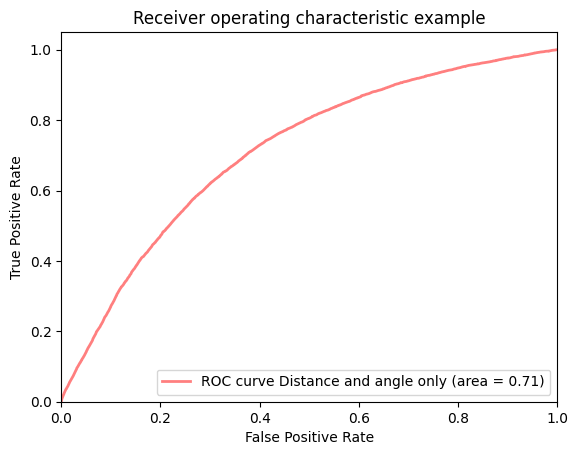

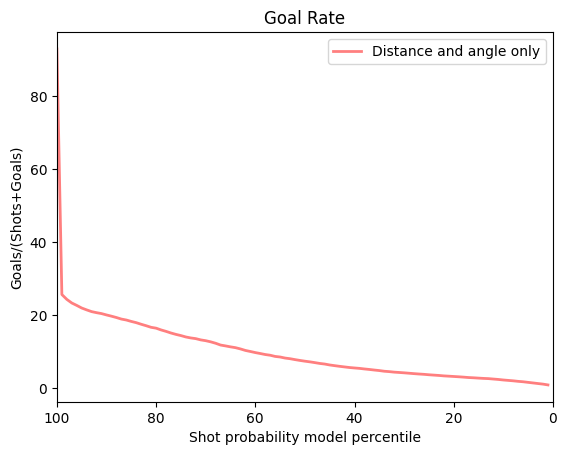

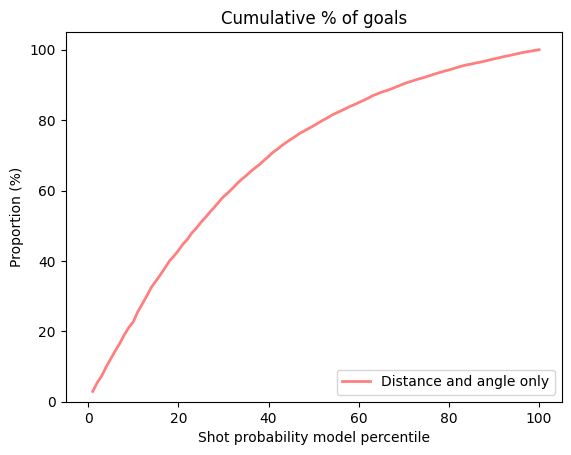

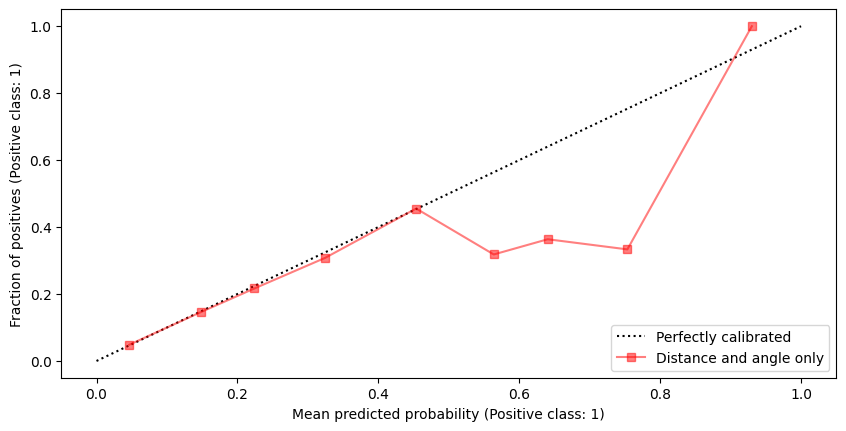

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *
import comet_ml
from sklearn.metrics import precision_score, recall_score


experiment = comet_ml.Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu"
)
experiment.add_tags(['question5', 'angle_and_distance'])

X = df_train_val[[ "Angle", 'Distance']]
Y = df_train_val[["Est_un_but"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
experiment.log_metric('accuracy', accuracy)
precision = precision_score(y_test, predictions)
experiment.log_metric('precision', precision)
recall = recall_score(y_test, predictions)
experiment.log_metric('recall', recall)
print(precision)


experiment.set_model_graph(model)
experiment.log_model('Boosted tree(distance and angle)', '/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/q5.ipynb')

create_plots(X_test, y_test.to_numpy(), y_pred, 'Distance and angle only', experiment)


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *
import comet_ml
from sklearn.metrics import precision_score, recall_score


experiment = comet_ml.Experiment(
    api_key="<HIDDEN>",
    project_name="ift-6758-a22",
    workspace="teylouniseifu"
)
experiment.add_tags(['question5', 'all_features'])

df_train_val_params = df_train_val[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse', 'Est_un_but']]
#df_train_val_params = df_train_val[["Game_Time","Period_Number", "X_Coordinate", "Y_Coordinate", "Distance", "Angle", "Rebond", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_type", "Pre_Y", "Dist_from_LastEvnt", "Est_un_but"]]
df_train_val_params = df_train_val_params.copy()
df_train_val_params = replace_nans(df_train_val_params)
df_train_val_params = replace_infs(df_train_val_params)
df_train_val_params["Rebond"]=df_train_val_params["Rebond"].astype("category")
df_train_val_params["Last_event_type"]=df_train_val_params["Last_event_type"].astype("category")
df_train_val_params["Shot_Type"]=df_train_val_params["Shot_Type"].astype("category")

X = df_train_val_params[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse']]
#X = df_train_val_params[["Game_Time","Period_Number",  "X_Coordinate", "Rebond", "Pre_type", "Y_Coordinate", "Distance", "Angle", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_Y", "Dist_from_LastEvnt"]]
Y = df_train_val_params[["Est_un_but"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
#model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 1, max_depth= 5, gamma= 5, colsample_bytree= 0.8, eval_metric='auc', disable_default_eval_metric=True)
model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 15, max_depth= 6, gamma= 8, colsample_bytree= 0.9, eval_metric='auc', disable_default_eval_metric=True)

print(X_train.dtypes)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
precision = precision_score(y_test, predictions)
experiment.log_metric('precision', precision)
recall = recall_score(y_test, predictions)
experiment.log_metric('recall', recall)

#ytest = y_test['Est_un_but']
print(y_pred)
print(y_test.shape)

experiment.set_model_graph(model)
experiment.log_model('Boosted tree(all features) for q5', '/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/q5.ipynb')

create_plots(X_test, y_test.to_numpy().reshape(y_test.shape[0]), y_pred, 'all features', experiment)

In [9]:
from utils import *

print(grid_search(X, Y["Est_un_but"], model))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'tree_method': 'hist', 'subsample': 1.0, 'min_child_weight': 15, 'max_depth': 6, 'gamma': 8, 'colsample_bytree': 0.9}


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn, xgboost. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/teylouniseifu/ift-6758-a22/00d6738e8ed94ff2a0f0434e4c647944
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 4
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (652.53 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     model graph              : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: --

Secondes_jeu          float64
Period_Number           int64
X_Coordinate          float64
Y_Coordinate          float64
Distance              float64
Angle                 float64
X_last_event          float64
Y_last_event          float64
Sec_from_lastEvent    float64
Dis_from_lastEvent    float64
Angle_change          float64
Vitesse               float64
dtype: object
0.9067972721152814


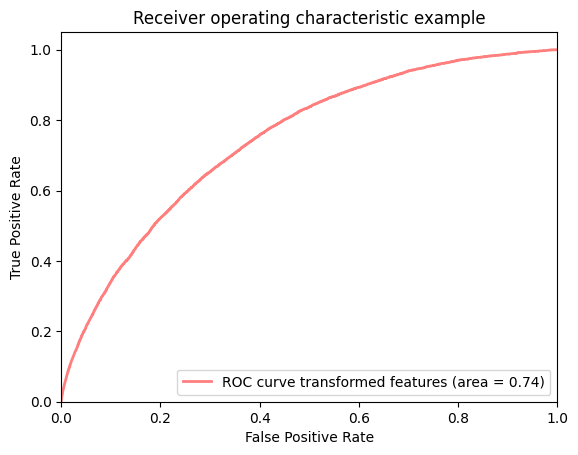

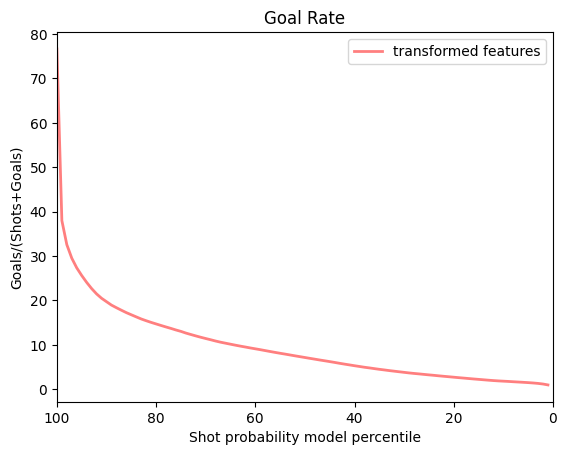

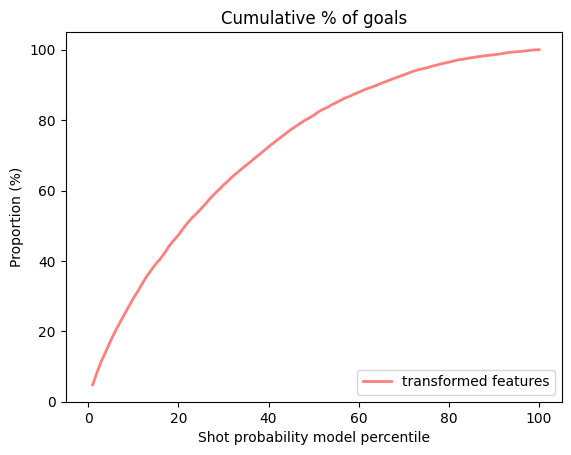

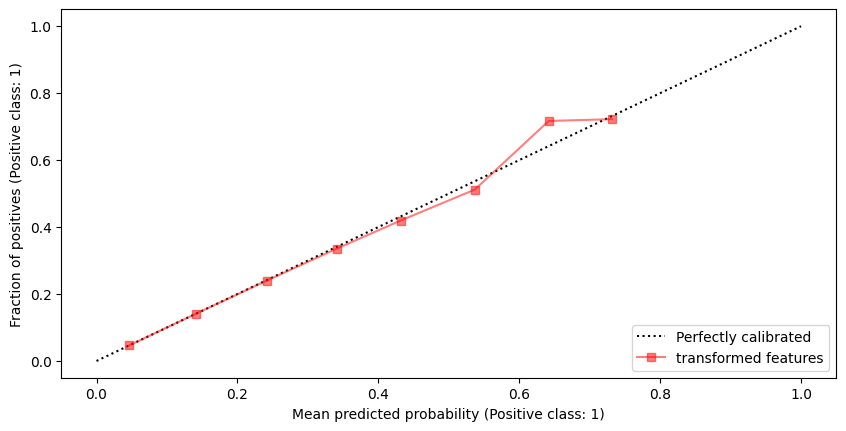

In [6]:
import ray
import comet_ml
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif, chi2,  mutual_info_classif, mutual_info_regression, chi2, r_regression, f_classif, f_regression
from utils import *
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from ray.air.callbacks.comet import CometLoggerCallback
from sklearn.metrics import precision_score, recall_score


experiment = comet_ml.Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu"
)
experiment.add_tags(['question5', 'features_transformed'])

fs = SelectKBest(score_func=f_regression, k=8)
W=df_train_val[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Angle_change','Vitesse']].copy()
W = replace_nans(W)
W = replace_infs(W)
print(W.dtypes)
Y = df_train_val[["Est_un_but"]]
W = pd.DataFrame(fs.fit_transform(W, Y["Est_un_but"]))
#W["Rebond"]=df_train_val["Rebond"].astype("category")
#W["Last_event_type"]=df_train_val["Last_event_type"].astype("category")
#W["Shot_Type"]=df_train_val["Shot_Type"].astype("category")
X_train, X_test, y_train, y_test = train_test_split(W, Y["Est_un_but"], test_size=0.33, random_state=10)
model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 0.9, min_child_weight= 5, max_depth= 8, gamma= 5, colsample_bytree= 0.7, eval_metric='auc', disable_default_eval_metric=True)
#model = XGBClassifier(tree_method="hist", enable_categorical=True, subsample= 1, min_child_weight= 15, max_depth= 6, gamma= 8, colsample_bytree= 0.9, eval_metric='auc', disable_default_eval_metric=True)

model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
y_pred=y_pred[:, 1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
experiment.log_metric('accuracy', accuracy)
precision = precision_score(y_test, predictions)
experiment.log_metric('precision', precision)
recall = recall_score(y_test, predictions)
experiment.log_metric('recall', recall)

experiment.set_model_graph(model)
experiment.log_model('Boosted tree(transformed features) for q5', '/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/q5.ipynb')


create_plots(X_test, y_test.to_numpy().reshape(y_test.shape[0]), y_pred, 'transformed features', experiment)

In [51]:
from utils import *

print(grid_search(W, Y["Est_un_but"], model))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'tree_method': 'hist', 'subsample': 0.9, 'min_child_weight': 5, 'max_depth': 8, 'gamma': 5, 'colsample_bytree': 0.7}


2022-11-25 10:54:09.275920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn, xgboost. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/teylouniseifu/ift-6758-a22/47004d85833e47d1b476b69a7e45b399
COMET INFO:   Parameters:
COMET INFO:     k          : 8
COMET INFO:     score_func : <function f_regression at 

        Est_un_but
203183           0
302308           0
103446           0
170520           0
63338            0
...            ...
279987           0
301987           1
284214           1
267336           0
59662            0

[208099 rows x 1 columns]
[0 0 0 ... 1 0 0]
[0 0 0 ... 0 0 1]
[0 0 0 ... 0 0 1]
(20809, 12)
Epoch 1/10
5853/5853 [==============================] - 8s 1ms/step - loss: 0.3279 - accuracy: 0.9056 - binary_crossentropy: 0.3279 - mean_squared_error: 0.0860 - val_loss: 0.2988 - val_accuracy: 0.9057 - val_binary_crossentropy: 0.2988 - val_mean_squared_error: 0.0828
Epoch 2/10
5853/5853 [==============================] - 7s 1ms/step - loss: 0.2953 - accuracy: 0.9060 - binary_crossentropy: 0.2953 - mean_squared_error: 0.0820 - val_loss: 0.2982 - val_accuracy: 0.9056 - val_binary_crossentropy: 0.2982 - val_mean_squared_error: 0.0826
Epoch 3/10
5853/5853 [==============================] - 7s 1ms/step - loss: 0.2937 - accuracy: 0.9060 - binary_crossentropy: 0.2937 - mean_

COMET WARNING: Set model graph ignored; already called. Call with overwrite=True to replace graph definition


[[0.03399493]
 [0.13063878]
 [0.14276564]
 ...
 [0.05768365]
 [0.01340121]
 [0.02037867]]


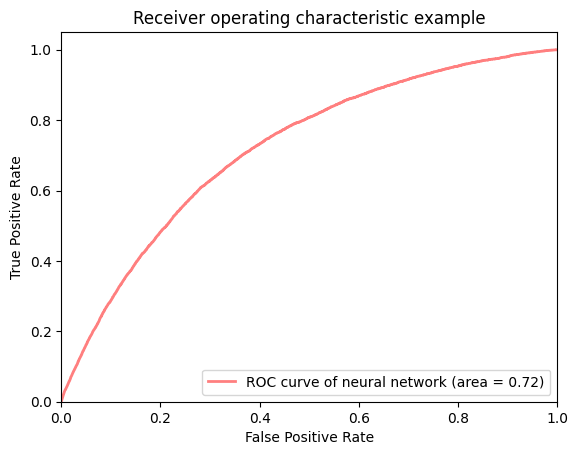

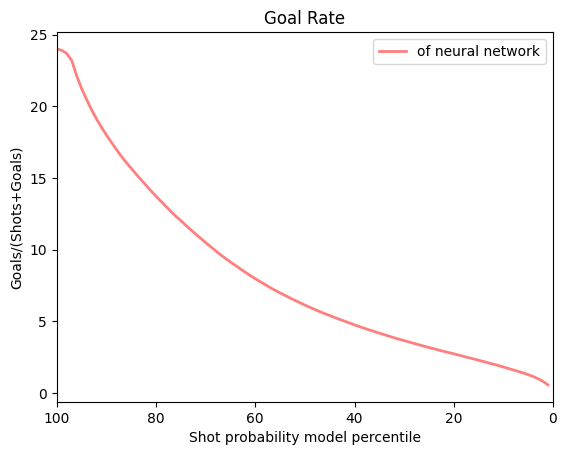

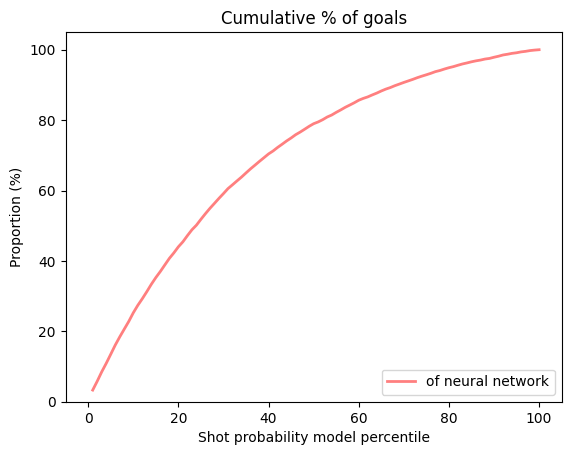

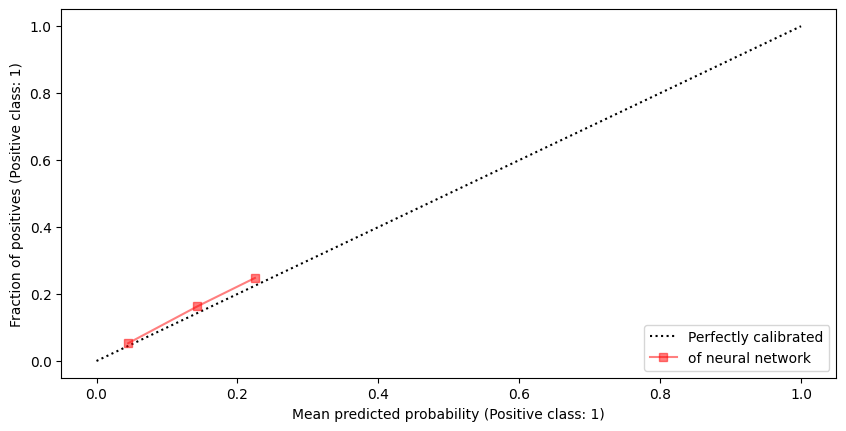

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from utils import *
from sklearn.metrics import precision_score, recall_score


from tensorflow import keras
from tensorflow.keras import activations, backend, layers
from tensorflow.keras.utils import to_categorical

experiment = comet_ml.Experiment(
    api_key="uHUS5l41WlDGkxYpJJMkBaLYd",
    project_name="ift-6758-a22",
    workspace="teylouniseifu"
)
experiment.add_tags(['question6', 'neural_network'])

df_train_val_params = df_train_val[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle','Shot_Type','Last_event_type'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Rebond','Angle_change','Vitesse', 'Est_un_but']]
#df_train_val_params = df_train_val[["Game_Time","Period_Number", "X_Coordinate", "Y_Coordinate", "Distance", "Angle", "Rebond", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_type", "Pre_Y", "Dist_from_LastEvnt", "Est_un_but"]]
df_train_val_params = df_train_val_params.copy()
df_train_val_params = replace_nans(df_train_val_params)
df_train_val_params = replace_infs(df_train_val_params)
df_train_val_params["Rebond"]=df_train_val_params["Rebond"].astype("category")
df_train_val_params["Last_event_type"]=df_train_val_params["Last_event_type"].astype("category")
df_train_val_params["Shot_Type"]=df_train_val_params["Shot_Type"].astype("category")

X = df_train_val_params[['Secondes_jeu','Period_Number','X_Coordinate','Y_Coordinate','Distance','Angle'
,'X_last_event','Y_last_event','Sec_from_lastEvent','Dis_from_lastEvent','Angle_change','Vitesse']]
#X = df_train_val_params[["Game_Time","Period_Number",  "X_Coordinate", "Rebond", "Pre_type", "Y_Coordinate", "Distance", "Angle", "Changement_d'angle_de_tir", "Vitesse", "Time_Since_LastEvnt", "Pre_X", "Pre_Y", "Dist_from_LastEvnt"]]
Y = df_train_val_params[["Est_un_but"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)

inputs = keras.Input(shape=(X_train.shape[1]))

inner = layers.Flatten()(inputs)

inner = layers.Dense(32, activation='relu')(inner)
inner = layers.Dense(16, activation='relu')(inner)
inner = layers.Dense(4, activation='relu')(inner)

outputs = layers.Dense(1, activation='sigmoid')(inner)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy","mean_squared_error"]
)

print(y_train)

X_train=X_train.to_numpy()
y_train=y_train.to_numpy().reshape((y_train.shape[0]))

print(y_train)


Yv = y_train[:int(y_train.shape[0]/10)]
print(Yv)
Xv = X_train[:int(X_train.shape[0]/10), :].astype(np.float32)

Y = y_train[int(y_train.shape[0]/10):]
X = X_train[int(X_train.shape[0]/10):, :].astype(np.float32)

print(Yv)
print(Xv.shape)

history = model.fit(X,
                    Y,
                    batch_size=32,
                    epochs=10,
                    validation_data=(Xv, Yv))

y_pred = model.predict(X_test)
print(y_pred)
y_pred=y_pred.reshape(y_pred.shape[0])

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
experiment.log_metric('accuracy', accuracy)
precision = precision_score(y_test, predictions)
experiment.log_metric('precision', precision)
recall = recall_score(y_test, predictions)
experiment.log_metric('recall', recall)
experiment.set_model_graph(model)

experiment.log_model('neural network for q5', '/Users/saifkurdi-teylouni/Downloads/ift-6758-a22/q5.ipynb')

create_plots(X_test, y_test.to_numpy().reshape(y_test.shape[0]), y_pred, 'of neural network', experiment)